In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import torch

In [4]:
from scipy.spatial.distance import cdist

In [5]:
from sklearn.datasets import load_digits

In [6]:
digits = load_digits(n_class=2)

In [7]:
images = digits.images

In [8]:
labels = digits.target

In [9]:
images.shape

(360, 8, 8)

In [16]:
def get_c2c_distances(data_matrix, cluster_assignment, used_labels):
    
    c2c_distances = np.zeros((used_labels.shape[0],used_labels.shape[0]))
    for i in range(used_labels.shape[0]):
        for j in range(used_labels.shape[0]):

            cluster_A_pts = data_matrix[ cluster_assignment == used_labels[i] , : ]
            cluster_B_pts = data_matrix[ cluster_assignment == used_labels[j] , : ]
            cluster_distance = cdist(cluster_A_pts, cluster_B_pts).mean()
            if i != j:
                c2c_distances[i,j] = cluster_distance
            else:
                c2c_distances[i,i] = 1e8
    return c2c_distances                

In [17]:
data_fake = np.array(
    [
    [.5, .1],
    [.3,.4],
    [.2, .6],
    [3.3, -1.0],
    [2.1,-.5],
    [1.5, -2.0]    
    ]
)

In [21]:
assignment_fake = np.array([0,0,0,1,1,2])
used_labels = np.unique(assignment_fake)

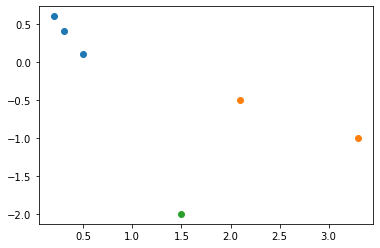

In [23]:
for i in used_labels:
    plt.scatter(
        data_fake[assignment_fake == i,0],
        data_fake[assignment_fake == i,1]
    )

In [26]:
dmat = get_c2c_distances(
    data_fake,
    assignment_fake,
    used_labels
)
np.unravel_index(np.argmin(dmat),dmat.shape)

(1, 2)

In [27]:
def agg_clus(data_matrix, n_clusters = 2):
    cluster_assignment = np.arange(data_matrix.shape[0])
    
    
    while np.unique(cluster_assignment).shape[0] > n_clusters:
        used_labels = np.unique(cluster_assignment)
        
        for i in used_labels:
            plt.scatter(
                data_matrix[cluster_assignment == i,0],
                data_matrix[cluster_assignment == i,1]
            )
        plt.show()
        
        # Calculate the distance between each cluster.
        c2c_distances = get_c2c_distances(data_matrix, cluster_assignment, used_labels)
                
        # Merge the two clusters that are closest. 
        i1, i2 = np.unravel_index(np.argmin(c2c_distances),c2c_distances.shape)
        label_1 = used_labels[i1]
        label_2 = used_labels[i2]
        cluster_assignment[cluster_assignment == label_2] = label_1
    return cluster_assignment
        

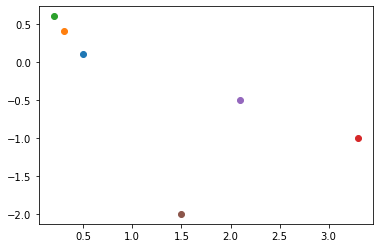

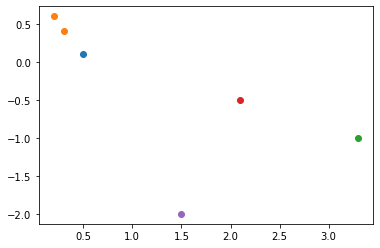

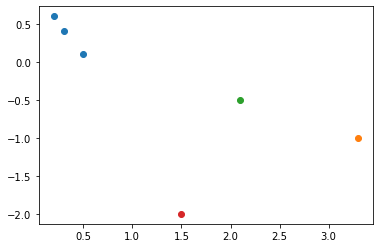

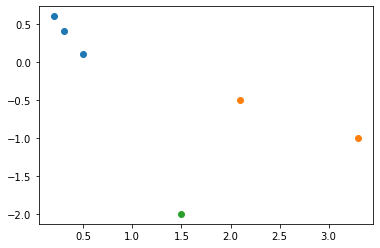

array([0, 0, 0, 3, 3, 3])

In [28]:
agg_clus(data_fake)

In [13]:
the_array = np.random.random((3,3))

np.where(the_array == np.amin(the_array))

(array([1]), array([0]))